In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import json
import os


## Load model information

In [2]:
csv_dir = '../data/well_design_exp3/'
batch_items = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'batch7']

In [3]:
dfwell_all = pd.DataFrame()
for it in batch_items:
    dftemp = pd.read_csv(os.path.join(csv_dir, f'well_design_opt_exp3_{it}.csv'))
    dfwell_all = pd.concat([dfwell_all, dftemp])

In [4]:
Etchegoin_x = np.load('../data/6x6model/Etchegoin_x_coord.npy')
Etchegoin_y = np.load('../data/6x6model/Etchegoin_y_coord.npy')
Etchegoin_z = np.load('../data/6x6model/Etchegoin_z_coord.npy')

Etchegoin_i = np.load('../data/6x6model/Etchegoin_i_index.npy')
Etchegoin_j = np.load('../data/6x6model/Etchegoin_j_index.npy')
Etchegoin_k = np.load('../data/6x6model/Etchegoin_k_index.npy')

## Well design params computation

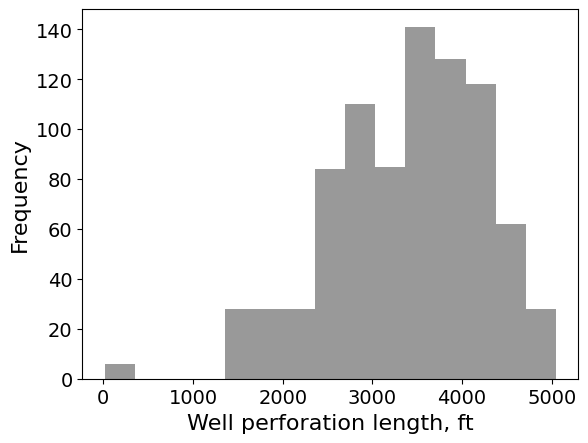

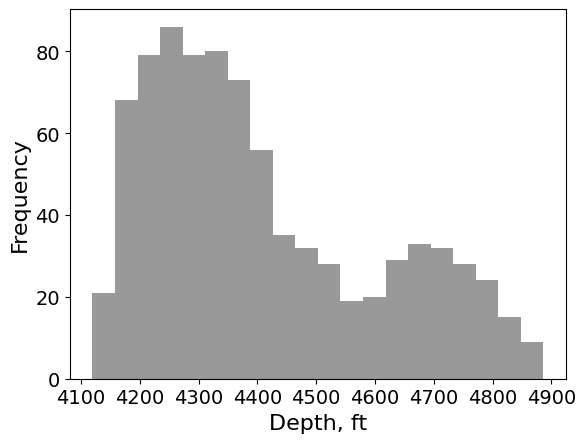

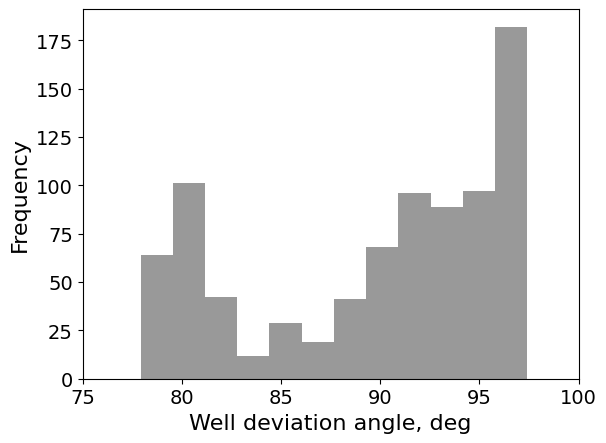

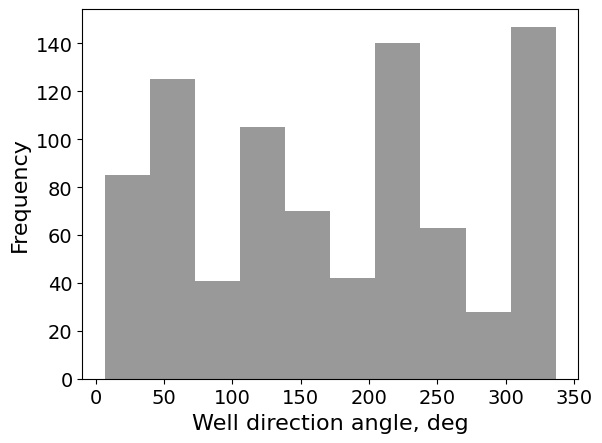

In [43]:
plt.hist(dfwell_all['length, ft'],bins=15, color='k', alpha=0.4)
plt.xlabel('Well perforation length, ft', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.grid()
plt.show()

plt.hist(dfwell_all['depth, ft'],bins=20, color='k', alpha=0.4)
plt.xlabel('Depth, ft', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.grid()
plt.show()

plt.hist(dfwell_all['deviation, deg'],bins=60, color='k', alpha=0.4)
plt.xlabel('Well deviation angle, deg', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlim([75, 100])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.grid()
plt.show()

plt.hist(dfwell_all['direction, deg'],bins=10, color='k', alpha=0.4)
plt.xlabel('Well direction angle, deg', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.grid()
plt.show()

## Define the wells selected for sensitivity work

In [8]:
selected_wells = ['case130', 'case136', 'case137', 'case243', 'case670', 'case671',  'case714']

In [9]:
caseid = []
idx_i, idx_j, idx_k = [], [], []
idx_x, idx_y, idx_z = [], [], []

In [10]:
for sw in selected_wells:

    caseid.append(sw)
    ii = json.loads(dfwell_all[dfwell_all['CaseID'] == sw].Xcoord.values[0])[0]
    jj = json.loads(dfwell_all[dfwell_all['CaseID'] == sw].Ycoord.values[0])[0]
    kk = json.loads(dfwell_all[dfwell_all['CaseID'] == sw].Zcoord.values[0])[0]
    idx_i.append(ii)
    idx_j.append(jj)
    idx_k.append(kk)
    idx_x.append(Etchegoin_x[ii-1,jj-1,kk-41])
    idx_y.append(Etchegoin_y[ii-1,jj-1,kk-41])
    idx_z.append(Etchegoin_z[ii-1,jj-1,kk-41])

    caseid.append(sw)
    ii = json.loads(dfwell_all[dfwell_all['CaseID'] == sw].Xcoord.values[0])[-1]
    jj = json.loads(dfwell_all[dfwell_all['CaseID'] == sw].Ycoord.values[0])[-1]
    kk = json.loads(dfwell_all[dfwell_all['CaseID'] == sw].Zcoord.values[0])[-1]
    idx_i.append(ii)
    idx_j.append(jj)
    idx_k.append(kk)
    idx_x.append(Etchegoin_x[ii-1,jj-1,kk-41])
    idx_y.append(Etchegoin_y[ii-1,jj-1,kk-41])
    idx_z.append(Etchegoin_z[ii-1,jj-1,kk-41])


## Plots and visualization

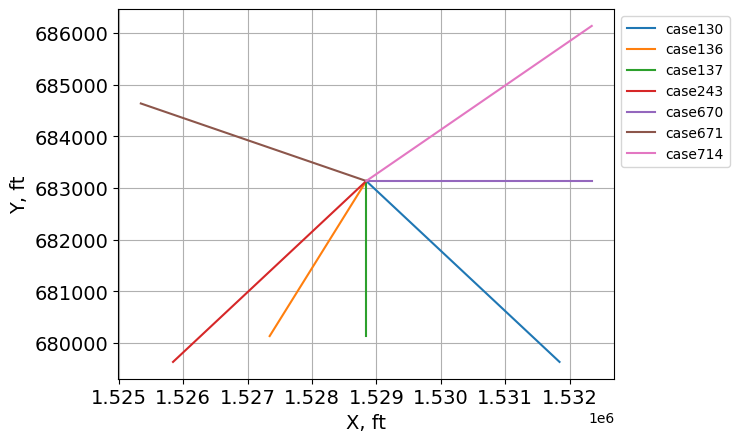

In [30]:
for sw in selected_wells:
    xline = dfwells[dfwells['CaseID'] == sw].idx_x.to_numpy()
    yline = dfwells[dfwells['CaseID'] == sw].idx_y.to_numpy()
    plt.plot(xline, yline, label=sw)


plt.xlabel('X, ft', fontsize=14)
plt.ylabel('Y, ft', fontsize=14)
plt.legend()
plt.legend(prop={'size': 10}, bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
# plt.savefig("MAML_tests.png",dpi=300)
plt.show()

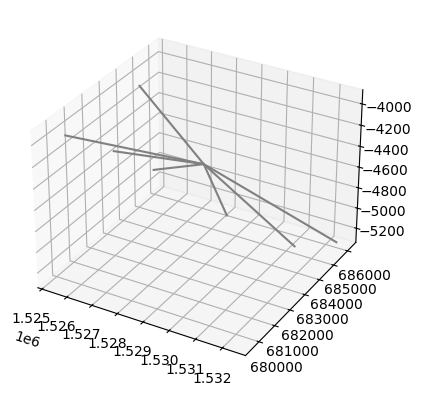

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
for sw in selected_wells:
    xline = dfwells[dfwells['CaseID'] == sw].idx_x.to_numpy()
    yline = dfwells[dfwells['CaseID'] == sw].idx_y.to_numpy()
    zline = dfwells[dfwells['CaseID'] == sw].idx_z.to_numpy()
    ax.plot3D(xline, yline, zline, 'gray')

